# Useful Imports

In [105]:
import pandas as pd

# DataViz
import matplotlib.pyplot as plt

# Import Dataset

In [106]:
transactions_1 = pd.read_csv('../data/transactions_1.csv')
transactions_1 = transactions_1.drop('Unnamed: 0', axis=1)

transactions_2 = pd.read_csv('../data/transactions_2.csv')
transactions_2 = transactions_2.drop('Unnamed: 0', axis=1)

transactions = pd.concat([transactions_1, transactions_2], axis=0)
transactions

,customer_id,product_id,date
0,8649525,Opel,2017-01-31T09:31:08.873Z
1,8649525,Volkswagen,2017-02-03T16:59:16.610Z
2,8649525,Volkswagen,2017-02-05T19:47:55.353Z
3,8649525,Volkswagen,2017-02-05T19:48:14.633Z
4,8649525,Volkswagen,2017-02-06T09:59:49.053Z
...,...,...,...
475950,1111821,Renault,2019-05-17T10:06:43.037Z
475951,4232782,Renault,2017-10-27T17:49:54.483Z
475952,4746355,Seat,2019-01-09T16:31:08.133Z
475953,4743766,Opel,2017-03-29T16:25:05.907Z


# Clean Dataset

In [107]:
transactions = transactions.drop_duplicates()
transactions["date"] = pd.to_datetime(transactions["date"], errors="coerce")
transactions["year_month"] = transactions["date"].dt.to_period("M")
transactions = transactions.drop('date', axis=1)
transactions = transactions[~transactions["product_id"].isin(["├ÅTS", "Equipe", "Oxygen", "Undefined", "Not a make"])]

C:\Users\moote\AppData\Local\Temp\ipykernel_14668\3196988085.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions["date"] = pd.to_datetime(transactions["date"], errors="coerce")
C:\Users\moote\AppData\Local\Temp\ipykernel_14668\3196988085.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  transactions["year_month"] = transactions["date"].dt.to_period("M")
C:\Users\moote\AppData\Local\Temp\ipykernel_14668\3196988085.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

# Merge with product mapping

In [108]:
product_mapping = pd.read_excel('../data/product_mapping.xlsx')
product_mapping

,product_id,group,country,vehicle_type,category
0,Renault,Renault,France,Car,Mid-range
1,Volkswagen,Volkswagen,Germany,Car,Mid-range
2,Peugeot,Stellantis,France,Car,Mid-range
3,Opel,Stellantis,Germany,Car,Mid-range
4,Audi,Volkswagen,Germany,Car,Premium
5,BMW,BMW,Germany,Car,Premium
6,Toyota,Toyota,Japan,Car,Mid-range
7,Nissan,Renault,Japan,Car,Mid-range
8,Ford,Ford,US,Car,Mid-range
9,Seat,Volkswagen,Spain,Car,Mid-range


In [109]:
transactions = pd.merge(transactions, product_mapping, on="product_id", how="inner")
transactions

,customer_id,product_id,year_month,group,country,vehicle_type,category
0,8649525,Opel,2017-01,Stellantis,Germany,Car,Mid-range
1,8649525,Volkswagen,2017-02,Volkswagen,Germany,Car,Mid-range
2,8649525,Volkswagen,2017-02,Volkswagen,Germany,Car,Mid-range
3,8649525,Volkswagen,2017-02,Volkswagen,Germany,Car,Mid-range
4,8649525,Volkswagen,2017-02,Volkswagen,Germany,Car,Mid-range
...,...,...,...,...,...,...,...
975906,1111821,Renault,2019-05,Renault,France,Car,Mid-range
975907,4232782,Renault,2017-10,Renault,France,Car,Mid-range
975908,4746355,Seat,2019-01,Volkswagen,Spain,Car,Mid-range
975909,4743766,Opel,2017-03,Stellantis,Germany,Car,Mid-range


# Customer statistics calculation

In [110]:
# Average transactions per month
customer_transactions = transactions.groupby("customer_id").agg(avg_transactions_per_month=("year_month", "count")).reset_index()
customer_transactions

,customer_id,avg_transactions_per_month
0,1001614,128
1,1005846,7
2,1006880,523
3,1014379,12
4,1014759,22
...,...,...
1997,9987263,524
1998,9993221,527
1999,9993896,70
2000,9996357,124


In [111]:
# Most bought product
most_bought_product = transactions.groupby(["customer_id", "product_id"]).size().reset_index(name="count")
most_bought_product = most_bought_product.loc[most_bought_product.groupby("customer_id")["count"].idxmax(), ["customer_id", "product_id"]]
most_bought_product

,customer_id,product_id
8,1001614,Renault
12,1005846,Opel
28,1006880,Renault
38,1014379,Toyota
41,1014759,Renault
...,...,...
21760,9987263,Audi
21788,9993221,Renault
21795,9993896,Fiat
21809,9996357,Renault


In [112]:
# Most bought group
most_bought_group = transactions.groupby(["customer_id", "group"]).size().reset_index(name="count")
most_bought_group = most_bought_group.loc[most_bought_group.groupby("customer_id")["count"].idxmax(), ["customer_id", "group"]]
most_bought_group

,customer_id,group
2,1001614,Stellantis
6,1005846,Stellantis
16,1006880,Volkswagen
21,1014379,Toyota
22,1014759,Renault
...,...,...
12207,9987263,Volkswagen
12212,9993221,Renault
12218,9993896,Stellantis
12222,9996357,Stellantis


In [113]:
# Most country chosen
most_chosen_country = transactions.groupby(["customer_id", "country"]).size().reset_index(name="count")
most_chosen_country = most_chosen_country.loc[most_chosen_country.groupby("customer_id")["count"].idxmax(), ["customer_id", "country"]]
most_chosen_country

,customer_id,country
0,1001614,France
8,1005846,Germany
10,1006880,France
21,1014379,Japan
24,1014759,France
...,...,...
11284,9987263,Germany
11290,9993221,France
11300,9993896,Italy
11302,9996357,France


In [115]:
# Most bought category
most_bought_category = transactions.groupby(["customer_id", "category"]).size().reset_index(name="count")
most_bought_category = most_bought_category.loc[most_bought_category.groupby("customer_id")["count"].idxmax(), ["customer_id", "category"]]
most_bought_category

,customer_id,category
0,1001614,Mid-range
1,1005846,Mid-range
2,1006880,Mid-range
4,1014379,Mid-range
5,1014759,Mid-range
...,...,...
3511,9987263,Premium
3512,9993221,Mid-range
3514,9993896,Mid-range
3515,9996357,Mid-range


In [116]:
# Merge all datasets
segmentation_df = customer_transactions.merge(most_bought_product, on="customer_id", how="inner") \
                                       .merge(most_bought_group, on="customer_id", how="inner") \
                                       .merge(most_chosen_country, on="customer_id", how="inner") \
                                       .merge(most_bought_category, on="customer_id", how="inner")
segmentation_df

,customer_id,avg_transactions_per_month,product_id,group,country,category
0,1001614,128,Renault,Stellantis,France,Mid-range
1,1005846,7,Opel,Stellantis,Germany,Mid-range
2,1006880,523,Renault,Volkswagen,France,Mid-range
3,1014379,12,Toyota,Toyota,Japan,Mid-range
4,1014759,22,Renault,Renault,France,Mid-range
...,...,...,...,...,...,...
1997,9987263,524,Audi,Volkswagen,Germany,Premium
1998,9993221,527,Renault,Renault,France,Mid-range
1999,9993896,70,Fiat,Stellantis,Italy,Mid-range
2000,9996357,124,Renault,Stellantis,France,Mid-range


# KMeans Clustering

In [117]:
from sklearn.preprocessing import LabelEncoder

categorical_features = ["product_id", "group", "country", "category"]
numerical_features = ["avg_transactions_per_month"]

label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    segmentation_df[col] = le.fit_transform(segmentation_df[col])
    label_encoders[col] = le
segmentation_df

,customer_id,avg_transactions_per_month,product_id,group,country,category
0,1001614,128,21,12,1,0
1,1005846,7,18,12,2,0
2,1006880,523,21,15,1,0
3,1014379,12,25,14,4,0
4,1014759,22,21,11,1,0
...,...,...,...,...,...,...
1997,9987263,524,1,15,2,1
1998,9993221,527,21,11,1,0
1999,9993896,70,7,12,3,0
2000,9996357,124,21,12,1,0


In [118]:
from sklearn.preprocessing import StandardScaler

features_for_clustering = ['avg_transactions_per_month', 'product_id', 'group', 'country', 'category']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(segmentation_df[features_for_clustering])

segmentation_scaled_df = pd.DataFrame(scaled_features, columns=features_for_clustering)
segmentation_scaled_df

,avg_transactions_per_month,product_id,group,country,category
0,-0.230846,0.521877,0.156879,-0.566496,-0.336855
1,-0.308550,0.151688,0.156879,-0.014342,-0.336855
2,0.022818,0.521877,0.993657,-0.566496,-0.336855
3,-0.305339,1.015463,0.714731,1.089966,-0.336855
4,-0.298917,0.521877,-0.122048,-0.566496,-0.336855
...,...,...,...,...,...
1997,0.023460,-1.946052,0.993657,-0.014342,2.936853
1998,0.025387,0.521877,-0.122048,-0.566496,-0.336855
1999,-0.268092,-1.205673,0.156879,0.537812,-0.336855
2000,-0.233414,0.521877,0.156879,-0.566496,-0.336855


Text(0, 0.5, 'WCSS')

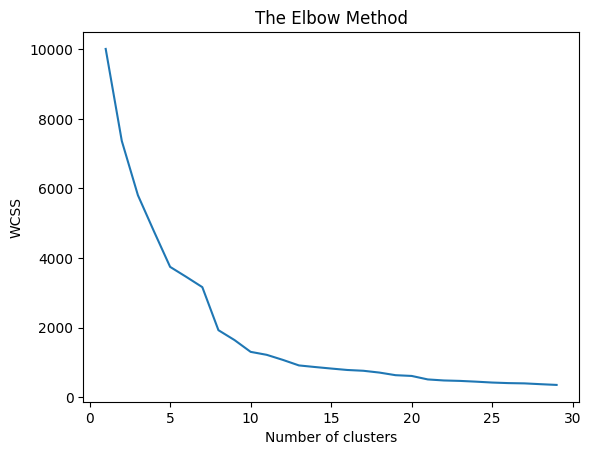

In [119]:
from sklearn.cluster import KMeans

max_cluster = 30
inertias = []
for i in range(1, max_cluster):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(segmentation_scaled_df)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, max_cluster), inertias)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [123]:
from kneed import KneeLocator
knee_locator = KneeLocator(range(1, max_cluster), inertias, curve="convex", direction="decreasing")
optimal_k = knee_locator.elbow

print(f'Optimal number of clusters: {optimal_k}')
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(segmentation_scaled_df)

segmentation_df['cluster'] = kmeans.labels_
segmentation_df

Optimal number of clusters: 8


,customer_id,avg_transactions_per_month,product_id,group,country,category,cluster
0,1001614,128,21,12,1,0,0
1,1005846,7,18,12,2,0,0
2,1006880,523,21,15,1,0,0
3,1014379,12,25,14,4,0,0
4,1014759,22,21,11,1,0,0
...,...,...,...,...,...,...,...
1997,9987263,524,1,15,2,1,1
1998,9993221,527,21,11,1,0,0
1999,9993896,70,7,12,3,0,6
2000,9996357,124,21,12,1,0,0
